# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** [Faith Dayo-Ajobiewe]  
**Date:** [31/08/2024]

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
Briefly describe the purpose of the project and outline the key objectives.

The purpose of this project is to gain a more profound understanding of customer experiences and sentiments towards Beats by Dre Speaker(Beats Pill) by comparing Beats Pill with it's primary competitors in the portable bluetooth speaker market . The goal is to evaluate how these speakers perform based on customer reviews across features like sound quality, portability, battery life, and overall satisfaction and identify Beats Pill strength and weaknessess.

The key objectives are:
1. Gather data on Beats pill and some other brands speakers within the same price range and analyze customer reviews to gain insights into their experiences and sentiments related to the products.
2. Identify common themes in customer reviews by using sentiment analysis to build a more holistic view of customer opinions, preferences, and pain points to understand their overall satisfaction.
3. Utilize the gathered insights to make informed decisions that prioritize customer satisfaction and long-term relationships.

Business Question:

* What is the sentiment distribution across all product reviews?
* What is the overall sentiments towards Beats Pill?
* is there a correlation between customer rating and sentiment scores?
* Are the customers expressing more emotional or logical approach in the Beats Pill reviews?
* How do sentiment trends evolve monthly across each product?
* What are the features that most customers value the most in each product?
* Which features have generated both the most customer satisfaction and dissatisfaction based on sentiment analysis of customer reviews?
* In what specific areas do competitor speakers outpeform Beats Pill?
* What are the strengths and weaknesses of the products?




### 3.2 Background
Provide context about Beats by Dre and the importance of consumer sentiment analysis in the tech industry.

* Beats by Dre is a well-known brand in the audio industry, particularly famous for its stylish, high-quality and heavy bass headphones and speakers. Beats gained a reputation for combining sleek design with powerful sound, appealing to both audiophiles and the general public. Over the years, the brand has expanded its product range to include wireless earbuds and portable speakers. In 2014, Beats was acquired by Apple, which has further help Beats expand its cultural territory and technology innovation to newer reaches.

* Consumer sentiment analysis is important in the tech industry because it provides companies like Beats with a deeper understanding of how customers feel about their products. In a highly competitive markets understanding customers sentiments through sentiments analysis allows tech companines to refine their products, address negative feedbacks and improve user experience.

## 4. Data Description

### 4.1 Data Sources
Describe the sources of your data (e.g., Amazon reviews).

The Beats by Dre product used for this analysis is **Beats Pill**, a portable bluetooth wireless water-resistant speaker. Eight brands was selected for comparison having the same features and similar price range as Beats Pill as well as their relevance in the market.

The dataset use for the sentiment analysis was sourced from customer reviews on the Amazon website(Amazon.com) where thousands of people has purchase this product.

Here are the names and links of the products:
1. Beats Pill: https://www.amazon.com/Beats-Pill-Compatible-Built-Microphone/dp/B0D4SX9RC6/
2. Bose SoundLink Flex: Url: https://www.amazon.com/Bose-SoundLink-Bluetooth-Portable-Waterproof/dp/B099TJGJ91/
3. JBL Charge5: https://www.amazon.com/JBL-CHARGE-Portable-Bluetooth-Waterproof/dp/B08X4XBB26/
4. Ultimate Ears Boom3: https://www.amazon.com/Ultimate-Ears-Portable-Bluetooth-Waterproof/dp/B07DD3WBYW/
5. TREBLAB HD Max: https://www.amazon.com/TREBLAB-HD-Max-Bluetooth-Powerbank-Waterproof/dp/B08G55RRQN
6. JBL Xtreme2: https://www.amazon.com/JBL-Waterproof-portable-Bluetooth-speaker/dp/B07CVP5TVZ/
7. Sonos Roam2: https://www.amazon.com/Sonos-ROAM1US1BLK-Roam-Black/dp/B08Z1RP9K8/
8. Marshall Emberton II: https://www.amazon.com/Marshall-Emberton-Portable-Bluetooth-Speaker/dp/B09XXW54QG/
9. Ultimate Megaboom3: https://www.amazon.com/Ultimate-Ears-MEGABOOM-Bluetooth-Waterproof/dp/B07DD3W154
10. Sony XE300: https://www.amazon.com/Sony-SRS-XE300-Portable-Bluetooth-Speaker-Waterproof-Shockproof/dp/B0B445JCZ3/
11. Bose SoundLink Color II: https://www.amazon.com/Bose-SoundLink-Color-Bluetooth-speaker/dp/B01HETFQKS/

### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

Data gathering process:
1. The first step involved identifying the Beats product and its competitors products for analysis. This selection was based on the price range and relevance in the markets.
2. I conducted a search for these products on the Amazon website to obtain their ASIN number, which serve as a product identifers.
3. To collect customers reviews, I utilized a third party tool, Oxylabs API. This tool allow for automated scraping of reviews directly from the Amazon website.
4. The ASIN obtained from Amazon was inputted into the Oxylabs API. I then specifed the range of pages by setting the starting and ending page number to ensure a comprehensive data collection.
5. The scraped data was then exported from Oxylabs in JSON format.
6. The JSON files were imported into Goggle Collab where they were loaded into DataFrame for processing by removing duplicates. The processed data was then saved as a CSV file.
7. The data gathering process was repeated for each additional product and each data was saved as a separate CSV files.
8. Finally all the CSV files were loaded into individual DataFrames and then merged together. The consolidated data was then saved as a single CSV file.


### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

**IMPORT LIBARIES**

In [18]:
# Importing necessary libaries
import pandas as pd
import numpy as np

#Libaries for Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re # for text cleaning
# for sentiment analysis
from IPython.display import Image
from textblob import TextBlob

import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter

# To display Word Cloud
from wordcloud import WordCloud, STOPWORDS

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Load dataset
df = pd.read_csv('speaker_reviews.csv')
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2SSSH04J4J264,B0D4SX9RC6,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,True,17,Color: Statement RedStyle: PillPattern: Withou...
1,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,8,Color: Champagne GoldStyle: PillPattern: Witho...
2,R39X7USU3OX34C,B0D4SX9RC6,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",AFSZPNTTLYCLNP536L6VS6UMFTNQ,True,7,Color: Statement RedStyle: PillPattern: Withou...
3,R1BHCCLK5GZ5VZ,B0D4SX9RC6,5.0 out of 5 stars Beats Pill,Gregory Stratman,5,"I love the size, weight and quality of my Pill...","Reviewed in the United States August 2, 2024",AHCXUEC2FLLJ3S6F762OSBZJRDPA,True,5,Color: Matte BlackStyle: PillPattern: Without ...
4,R3SO3HMV0YC0WB,B0D4SX9RC6,5.0 out of 5 stars Beats pill,Bryan Pennington,5,"Great product, also very sturdy it survived a ...","Reviewed in the United States August 6, 2024",AH6XBZHLROVWE5R25OTBLS2F4CEQ,True,1,Color: Champagne GoldStyle: PillPattern: Witho...


In [20]:
df.shape

(1048, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1048 non-null   object
 1   product_id          1048 non-null   object
 2   title               1048 non-null   object
 3   author              1047 non-null   object
 4   rating              1048 non-null   int64 
 5   content             1048 non-null   object
 6   timestamp           1048 non-null   object
 7   profile_id          1048 non-null   object
 8   is_verified         1048 non-null   bool  
 9   helpful_count       1048 non-null   int64 
 10  product_attributes  1048 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 83.0+ KB


**Observations**


1. we have a total of 11 columns and 1048 rows in the dataset.
2. There is only one missing value in the author Column which has 1047 entries instead of 1048.
3. All the data types seem okay and don't need any explicit cleaning.

In [22]:
# Identify the missing value in the author column
df[df['author'].isnull()==True]

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
963,R24OZ4S5A0CPY6,B01HETFQKS,3.0 out of 5 stars Poor sound quality,NaN,3,It was hard to believe it's a Bose speaker. Th...,"Reviewed in the United States July 6, 2024",AEUA5BCZU5VI2USD2CXYVTN74OVQ,True,0,Color: Soft Black


In [23]:
# using a placeholder instead of dropping the entire row
df['author'].fillna('Anonymous', inplace=True)

In [24]:
# Checking if the null value is handled
df.isnull().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0




* No Null value in the dataset

In [25]:
# checking for duplicates
df.duplicated().sum()

0

* No duplicates in the dataset

***CREATING NEW COLUMNS FROM EXISTING COLUMNS***

In [26]:
# creating color column from product attributes
df['color'] = df['product_attributes'].astype(str).str.extract(r'color:\s*([^\n,:]*)', flags=re.IGNORECASE)
df['color'].head(2)

,color
0,Statement RedStyle
1,Champagne GoldStyle


In [27]:
# Extract the date column from the timestamp column
df['date'] = df['timestamp'].astype(str).str.extract(r'States \s*([^\n:]*)', flags=re.IGNORECASE)
df['date'].head()

,date
0,"July 1, 2024"
1,"July 11, 2024"
2,"July 8, 2024"
3,"August 2, 2024"
4,"August 6, 2024"


In [28]:
# converting the date column to a datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [29]:
# Extract the Year and month from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [30]:
#Product_names =["Beats Pill", "Bose SoundLink Flex", "JBL Charge5", "Ultimate Ears Boom3", "TREBLAB HD Max", "JBL Xtreme2",
                # "Sonos Roam2", "Marshall Emberton II", "Ultimate Megaboom3", "Sony XE300","Bose SoundLink Color II"]

print(df['product_id'].unique())

['B0D4SX9RC6' 'B099TJGJ91' 'B08X4XBB26' 'B07DD3WBYW' 'B08G55RRQN'
 'B07CVP5TVZ' 'B08Z1RP9K8' 'B09XXW54QG' 'B07DD3W154' 'B0B445JCZ3'
 'B01HETFQKS']


In [31]:
# create a new column, 'product name'

# Adding the Product_names to the columns
asin_to_product_name = {
    "B0D4SX9RC6": "Beats Pill",
    "B099TJGJ91": "Bose SoundLink Flex",
    "B08X4XBB26": "JBL Charge5",
    "B07DD3WBYW": "Ultimate Ears Boom3",
    "B08G55RRQN": "TREBLAB HD Max",
    "B07CVP5TVZ": "JBL Xtreme2",
    "B08Z1RP9K8": "Sonos Roam2",
    "B09XXW54QG": "Marshall Emberton II",
    "B07DD3W154": "Ultimate Megaboom3",
    "B0B445JCZ3": "Sony XE300",
    "B01HETFQKS": "Bose SoundLink Color II"
}
# Create a new column 'product_name' using the mapping
df['product_name'] = df['product_id'].map(asin_to_product_name)

In [32]:
df.head(2)

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,color,date,year,month,product_name
0,R2SSSH04J4J264,B0D4SX9RC6,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,True,17,Color: Statement RedStyle: PillPattern: Withou...,Statement RedStyle,2024-07-01,2024,7,Beats Pill
1,R4BQHA0TLLJNN,B0D4SX9RC6,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,8,Color: Champagne GoldStyle: PillPattern: Witho...,Champagne GoldStyle,2024-07-11,2024,7,Beats Pill


In [33]:
# checking the datatype of the new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   review_id           1048 non-null   object        
 1   product_id          1048 non-null   object        
 2   title               1048 non-null   object        
 3   author              1048 non-null   object        
 4   rating              1048 non-null   int64         
 5   content             1048 non-null   object        
 6   timestamp           1048 non-null   object        
 7   profile_id          1048 non-null   object        
 8   is_verified         1048 non-null   bool          
 9   helpful_count       1048 non-null   int64         
 10  product_attributes  1048 non-null   object        
 11  color               1048 non-null   object        
 12  date                1048 non-null   datetime64[ns]
 13  year                1048 non-null   int32       

**OBSERVATIONS:**

1. All transformation has been correctly applied and the new columns are in the correct format.

2. Each columns are in the appropriate data type.

3. There are no missing values in the datasets.

In [34]:
# Distribution of the dataset
df['product_name'].value_counts()

,count
product_name,
Beats Pill,102
Bose SoundLink Flex,99
TREBLAB HD Max,99
Bose SoundLink Color II,99
Ultimate Ears Boom3,97
Sonos Roam2,97
Ultimate Megaboom3,97
JBL Charge5,92
JBL Xtreme2,91


## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


In [35]:
# General statistics
df[['rating', 'helpful_count']].describe()

,rating,helpful_count
count,1048.000000,1048.000000
mean,4.351145,5.408397
std,1.046566,31.819350
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,582.000000


In [36]:
# Ratings Distribution
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]
var_rating = df['rating'].var()

print('Median:', median_rating)
print('Mode:', mode_rating)
print('Variance:', var_rating)

Median: 5.0
Mode: 5
Variance: 1.0952995472341913


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

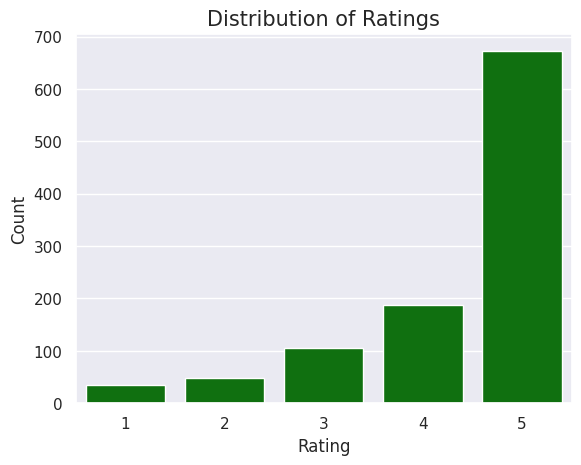

In [37]:
sns.set()
sns.set(style='darkgrid')
sns.countplot(x=df['rating'], color='green')
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* The distribution of the ratings is leaning heavily towards higher ratings with the majority being a '5'. This could indicate a high positive customer satisfaction towards the products.

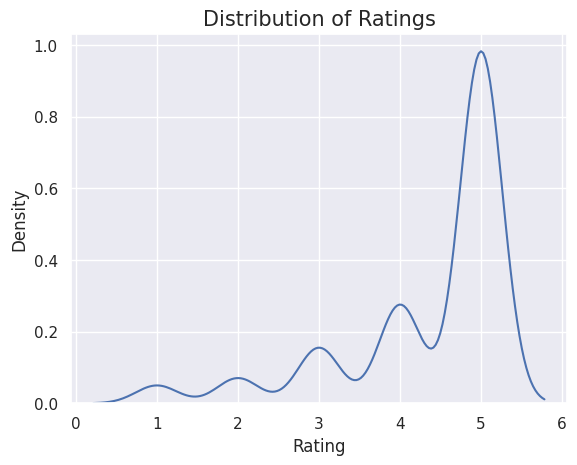

In [38]:
sns.distplot(df['rating'], hist=False)
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

* This chart shows the rating to be negatively skewed to the left because the tail on the left side is longer than the right side and this indicate that majority of the ratings are concentrated on the right side(high end) but with few ratings that are much lower trailing to the left.

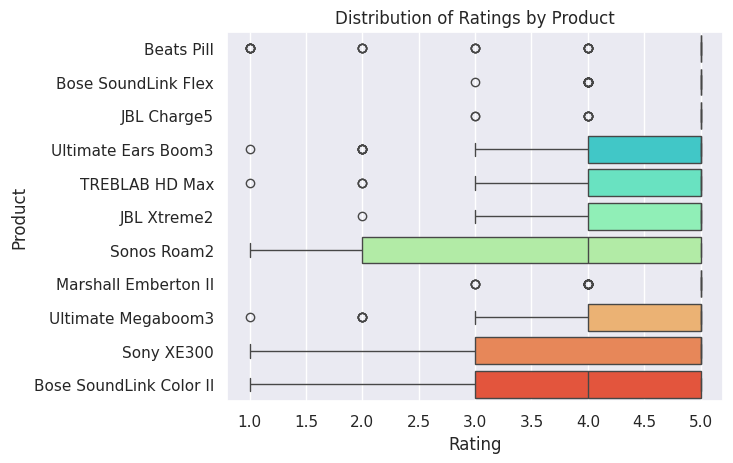

In [39]:
sns.boxplot(x=df['rating'], y=df['product_name'], palette='rainbow')
plt.title('Distribution of Ratings by Product')
plt.xlabel('Rating')
plt.ylabel('Product')
plt.show()

**Observations:**
* Most Products had higher ratings
* Majority of the products has outliers
* Beats Pill, Bose SoundLink Flex, JBL Charge5 and Marshall Emberton II have
really high ratings.

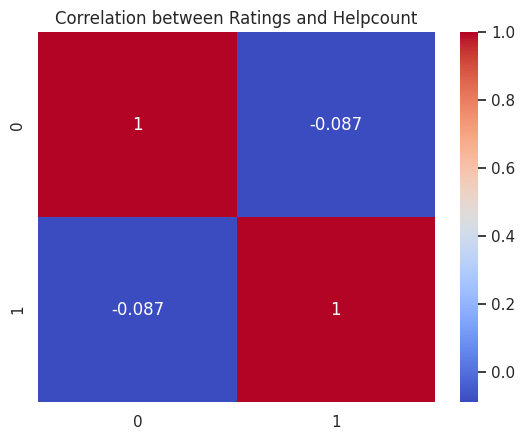

In [40]:
# Correlation matrix
corr = np.corrcoef(df['rating'],df['helpful_count'])
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings and Helpcount')
plt.show()

* The correlation coefficient (-0.087) between ratings and helpful count is very close to zero(0) which indicate a weak negative correlation. This suggest that there isn't a strong relationship between ratings and helpful count. This could also imply that high ratings do not necessarily correspond to a high helpful count and vice versa.

### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

**KEY FINDINGS:**

1. The mode for rating is '5', which indicate the most common rating. This suggests a general customer satisfaction trend, with many products achieving top rating and are frequently rated as excellent.

2. The mean rating of 4.3 is relatively high, indicating that on average, customers rate the products favorably.

3. The median is 5.0, which is higher than the mean. This implies that more than half of the ratings are '5', indicating that most customers gave the highest possible rating. However, the mean being lower than the median suggests that there are some lower ratings in the data and this pattern often occurs when most people are satisfied with the product, but a small number of customers had less positive experiences.

4. The standard deviation of '1.04' indicates that there is a moderate spread in the ratings. that is, while many ratings are near 5.0 there are still some ratings that are significantly lower. Therefore the ratings are not extremely concentrated around the mean but not so highly dispersed.

In conclusion, though the customers rate the product highly(median of '5') but the mean is lower than the median(4.3) due to a few low ratings. This suggests an overall satisfaction of the products with some negative sentiments/experience.

## 6. Sentiment Analysis

### 6.1 Methodology
Explain the sentiment analysis techniques used (e.g., TextBlob, NLTK) and provide code snippets.

I utilized NLTK(Natural Language Toolkit), a Python library for processing textual data to perform sentiment analysis on customer reviews. NLTK calculates the negative, positive, neutral and compound scores for each word and averages them to determine the overall sentiment of the text.

* The customer reviews were firstly cleaned to ensure the text contains only alphabetic characters. This involve removing punctuation, digits, and emojis resulting in a new column labelled content_clean.

* I utilized NLTK to perfom sentiment analysis on the cleaned reviews. A function was defined to apply this analysis to the reviews and classify the reviews into negative, positive and neutral sentiments

* Additional columns were added to the dataset to capture the compound scores and sentiment labels (positive, negative, or neutral) based on the calculated sentiment score.

* A function was defined to aggregate the sentiments score based on the sentiment label across all reviews.





In [42]:
# Clean the reviews to remove punctuation, digits, and emojis to keep alphabetic characters only
def preprocessing_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabetic characters and spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['content_clean'] = df['content'].apply(preprocessing_text)
df['content_clean'].head(10)

,content_clean
0,needed a new portable speaker for the home set...
1,i really like the new beats pill speaker the s...
2,so im super picky about sound and have spent a...
3,i love the size weight and quality of my pill ...
4,great product also very sturdy it survived a d...
5,i bought this because it was on sale and i alw...
6,great sound great battery life
7,this pound speaker sounds insane for its size ...
8,i bought the new pill mainly to use wired for ...
9,love these speakers but apple seemed to have m...


In [46]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Define a function to perform sentiment analysis on the content_clean column
def sentiment_analysis(df_sa, text):
  for review in df_sa[text]:
    sentiment_scores = sid.polarity_scores(review)
    # Print the sentiment scores
    print("Sentiment Scores:", sentiment_scores)
    # Determine sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
      print("Positive Sentiment")
    elif sentiment_scores['compound'] <= -0.05:
      print("Negative Sentiment")
    else:
      print("Neutral Sentiment")

In [47]:
sentiment_analysis(df, "content_clean")

Sentiment Scores: {'neg': 0.012, 'neu': 0.823, 'pos': 0.165, 'compound': 0.9935}
Positive Sentiment
Sentiment Scores: {'neg': 0.015, 'neu': 0.684, 'pos': 0.301, 'compound': 0.9898}
Positive Sentiment
Sentiment Scores: {'neg': 0.025, 'neu': 0.758, 'pos': 0.217, 'compound': 0.9851}
Positive Sentiment
Sentiment Scores: {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9628}
Positive Sentiment
Sentiment Scores: {'neg': 0.14, 'neu': 0.531, 'pos': 0.329, 'compound': 0.829}
Positive Sentiment
Sentiment Scores: {'neg': 0.023, 'neu': 0.779, 'pos': 0.198, 'compound': 0.9842}
Positive Sentiment
Sentiment Scores: {'neg': 0.0, 'neu': 0.268, 'pos': 0.732, 'compound': 0.8481}
Positive Sentiment
Sentiment Scores: {'neg': 0.092, 'neu': 0.729, 'pos': 0.179, 'compound': 0.5719}
Positive Sentiment
Sentiment Scores: {'neg': 0.047, 'neu': 0.872, 'pos': 0.081, 'compound': 0.7717}
Positive Sentiment
Sentiment Scores: {'neg': 0.107, 'neu': 0.7, 'pos': 0.193, 'compound': 0.8658}
Positive Sentiment
Sentimen

## 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


In [ ]:
sid = SentimentIntensityAnalyzer()
def get_sentiment(review):
  sentiment_scores = sid.polarity_scores(review)
  if sentiment_scores['compound'] >= 0.05:
    sentiment_label = "Positive"
  elif sentiment_scores['compound'] <= -0.05:
    sentiment_label = "Negative"
  else:
    sentiment_label = "Neutral"
  return pd.Series([sentiment_scores['compound'], sentiment_label], index=['sentiment_score', 'sentiment_label'])


df[['sentiment_score', 'sentiment_label']] = df['content_clean'].apply(get_sentiment)
#df.head()

### Sentiment distribution across all products

In [ ]:
sid = SentimentIntensityAnalyzer()
def sentiment_aggregate_scores(df_df, text_col):
  positive_count = 0
  negative_count = 0
  neutral_count = 0
  for review in df_df[text_col]:
    sentiment_scores = sid.polarity_scores(review)
    # Determine sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
       positive_count +=1
    elif sentiment_scores['compound'] <= -0.05:
       negative_count +=1
    else:
      neutral_count +=1

  return {
        "Positive": positive_count,
        "Negative": negative_count,
        "Neutral": neutral_count
    }


In [ ]:
sentiment_scores = sentiment_aggregate_scores(df, "content_clean")
sentiment_scores

{'Positive': 910, 'Negative': 107, 'Neutral': 31}

* We have a total of 910 positive sentiment scores, 107 negative sentiment scores, and 31 neutral sentiment scores across the dataset.

In [ ]:
# Calculating the sentiment distribution
product_sentiments = df.groupby(['product_name', 'sentiment_label']).size().unstack(fill_value=0) #fill_value, fills missing values with Zero
print(product_sentiments) #Unstack converts pd.series to dataframe

sentiment_label          Negative  Neutral  Positive
product_name                                        
Beats Pill                      5        7        90
Bose SoundLink Color II        21        0        78
Bose SoundLink Flex             6        0        93
JBL Charge5                     1        1        90
JBL Xtreme2                     4        3        84
Marshall Emberton II            5        3        77
Sonos Roam2                    21        3        73
Sony XE300                     11        3        76
TREBLAB HD Max                 11        3        85
Ultimate Ears Boom3            12        5        80
Ultimate Megaboom3             10        3        84


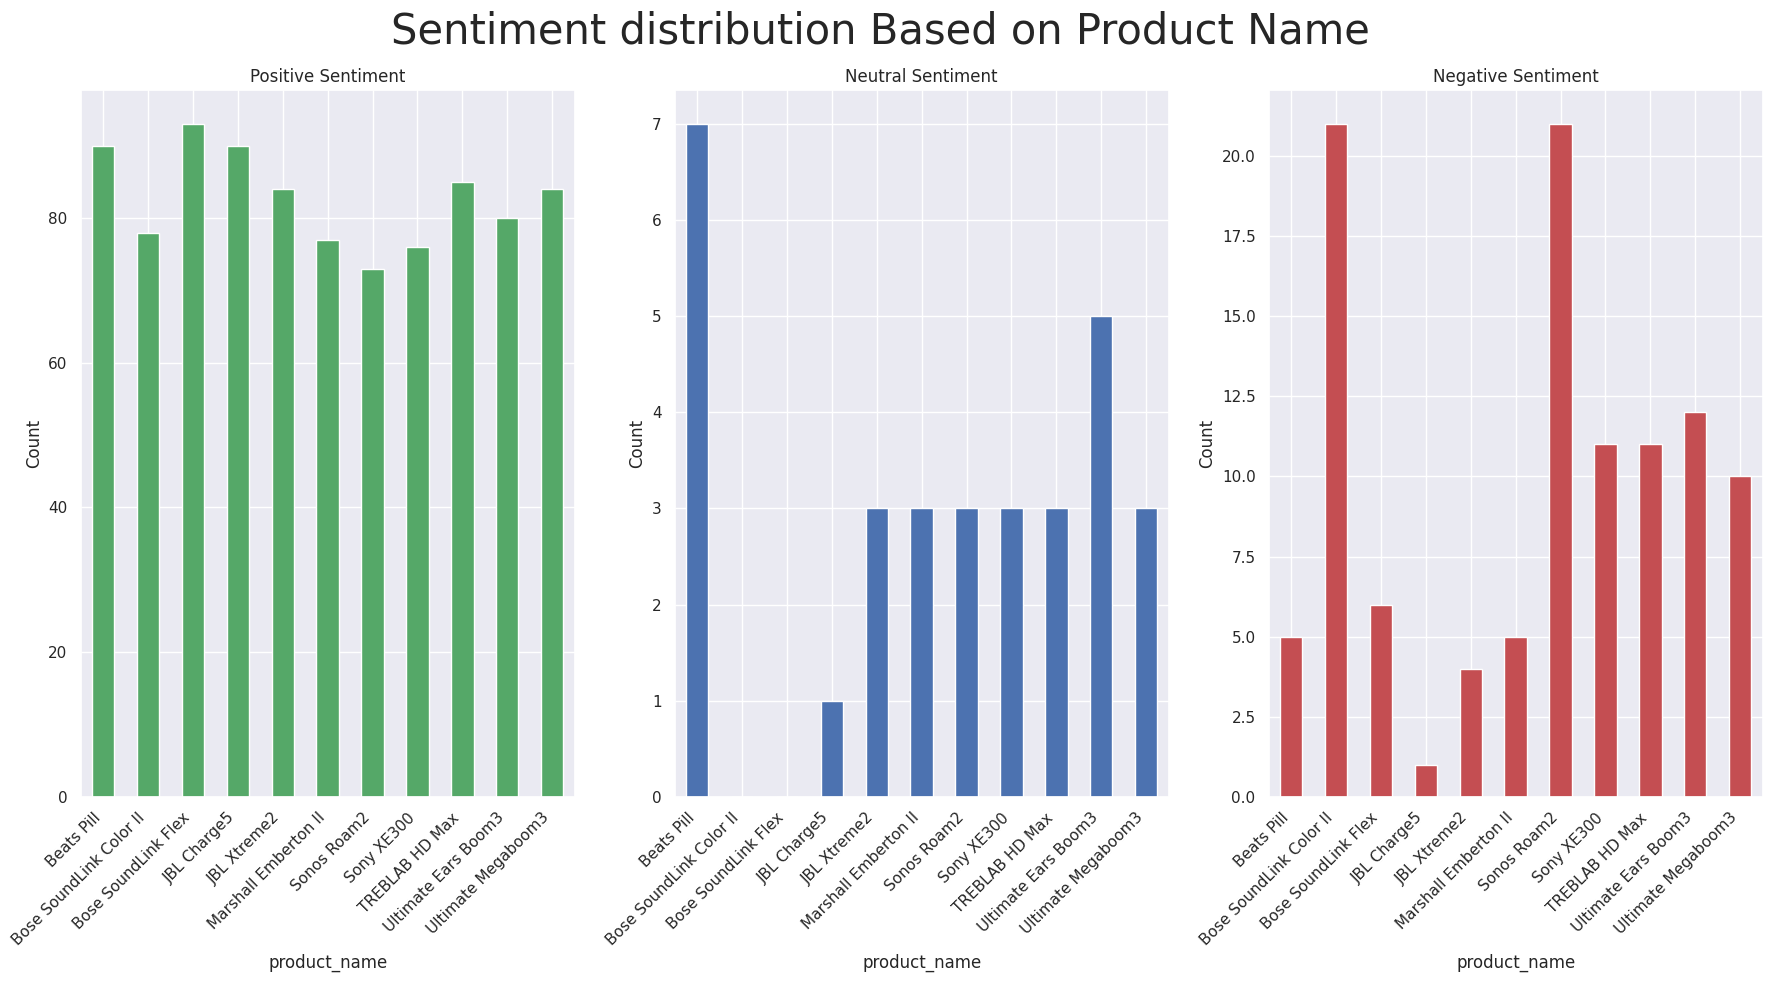

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

# Plot each sentiment type
product_sentiments['Positive'].plot(ax=ax[0], kind='bar', color='g', label='Positive')
product_sentiments['Neutral'].plot(ax=ax[1], kind='bar', color='b', label='Neutral')
product_sentiments['Negative'].plot(ax=ax[2], kind='bar', color='r', label='Negative')


# Setting titles and labels
ax[0].set_title('Positive Sentiment')
ax[1].set_title('Neutral Sentiment')
ax[2].set_title('Negative Sentiment')


ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')


fig.suptitle('Sentiment distribution Based on Product Name', size=30)
plt.tight_layout()
plt.show()



* Positive Reviews: The sentiment distribution chart for all the products analyzed, shows majority of the products have a high positive sentiments, Bose SoundLink Flex and Beats Pill has the highest positive sentiment.

* Neutral Reviews: These are the least frequent and show a balanced perception without strong opinions. The neutral reviews are evenly distributed across most products. Beats Pill stands out for having the highest number of neutral reviews.

* Negative Reviews: Although present, the negative reviews are significantly lower compared to positive ones. This suggests that while there are some areas for improvement, they are not widespread issues. Bose Soundlink colorII and Sonos Roam2 stands out for having the highest number of negative reviews.

* THE OVERALL SENTIMENTS TOWARDS BEATS BY DRE PRODUCT(Beats Pill)

 The sentiment towards the Beats Pill is overwhelmingly positive, with a relatively low count of negative and neutral reviews. This suggests that Majority of the customers generally have a favorable view of this product and are satisfied with its performance and quality.



### Correlation between customer rating and sentiment score

In [ ]:
Correlation = df['rating'].corr(df['sentiment_score'])
print(f"The correlation between Rating and Sentiment score is : {Correlation}")

The correlation between Rating and Sentiment score is : 0.45127768152084113


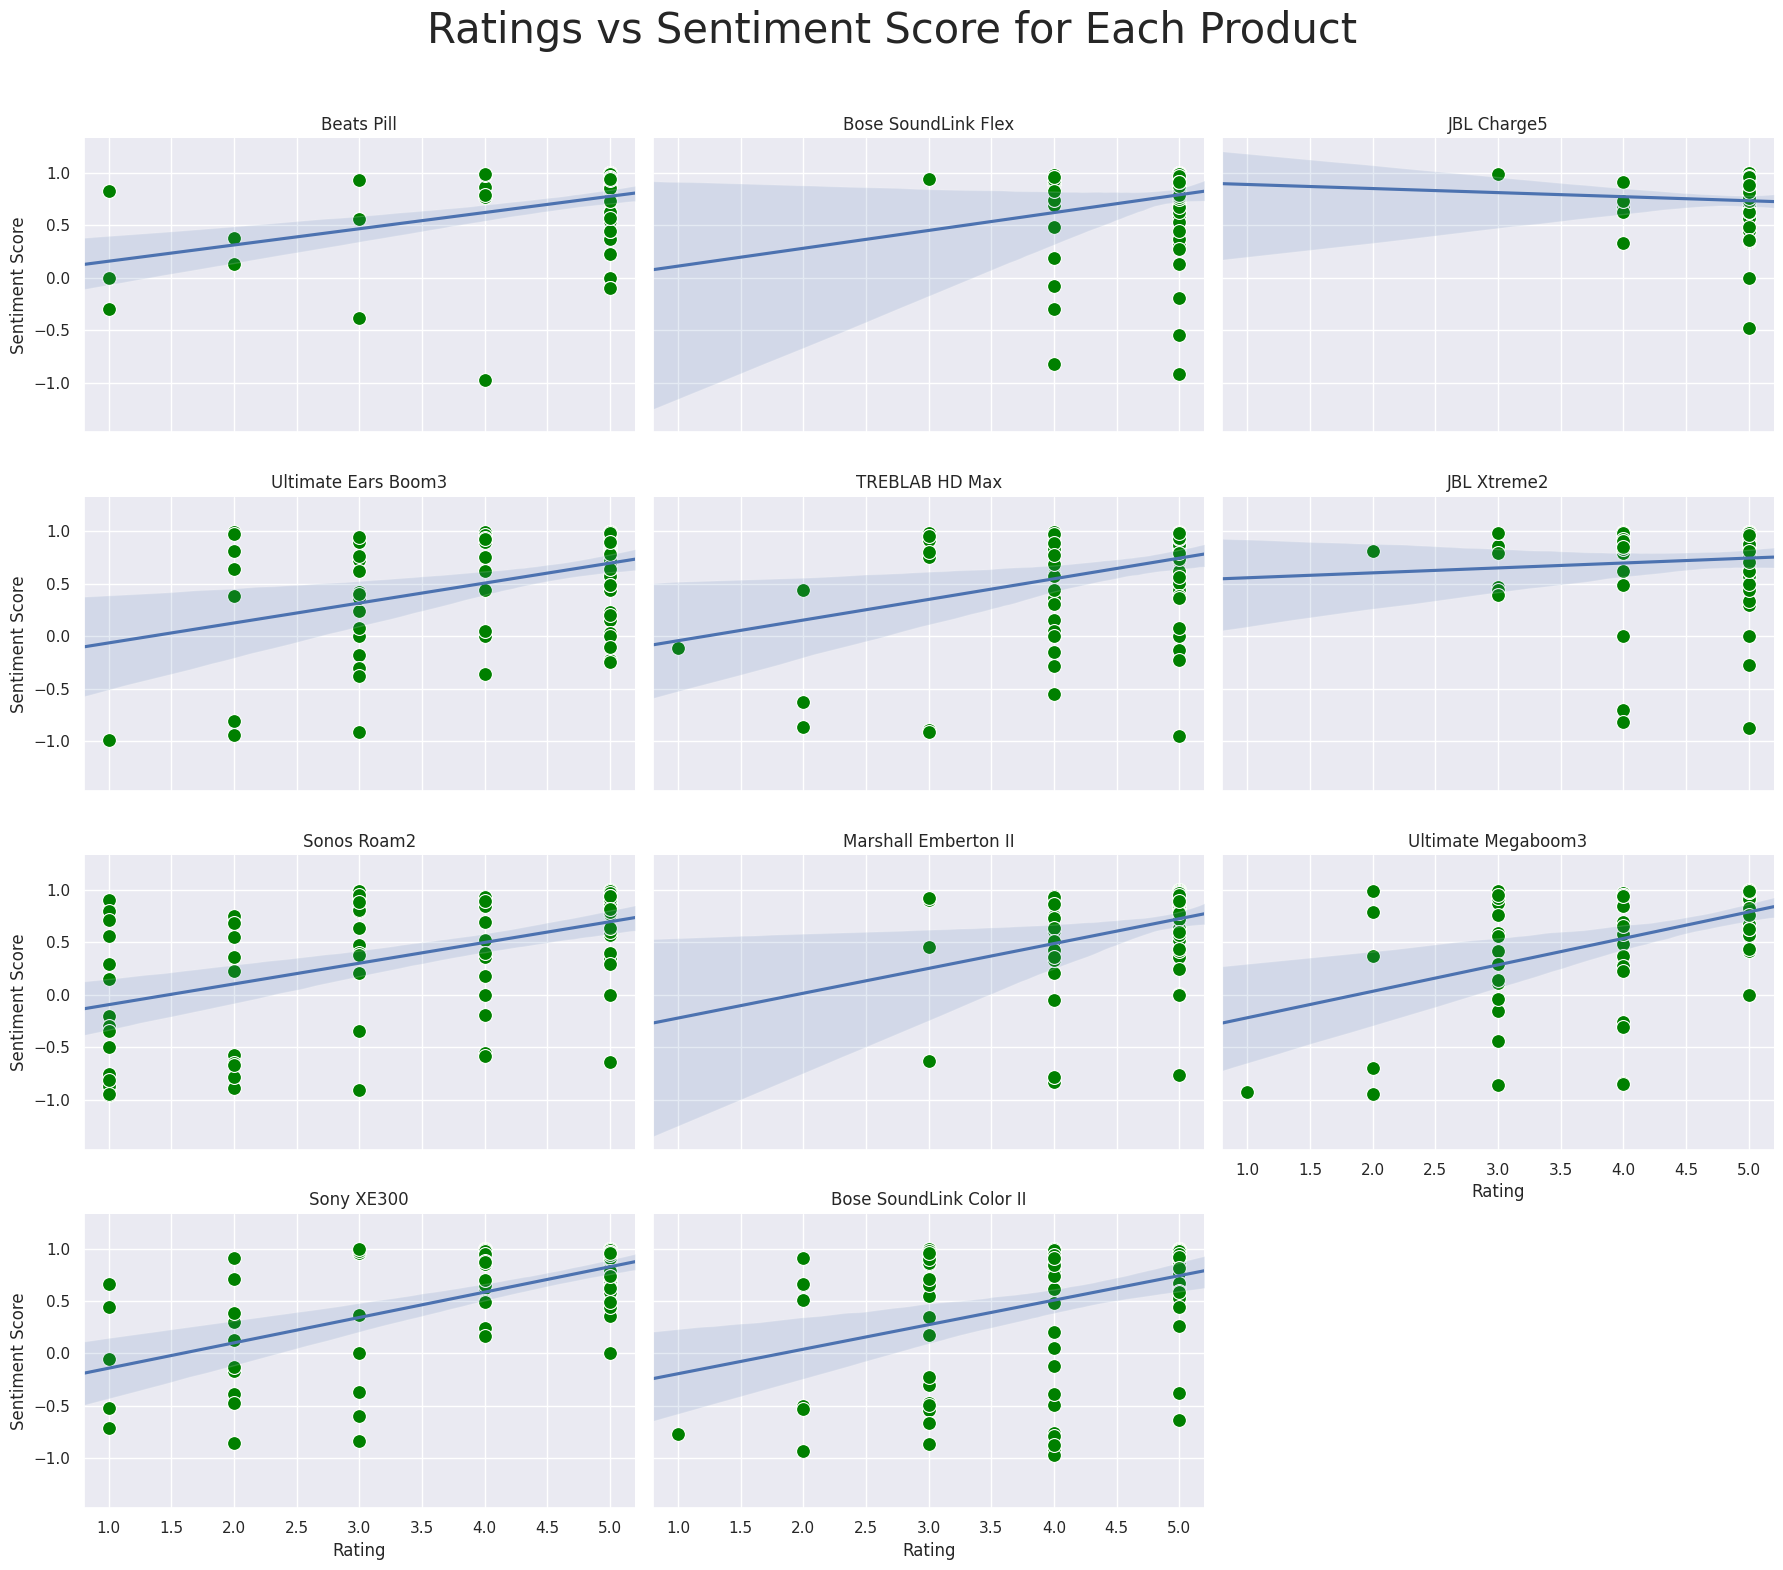

In [ ]:
# FacetGrid with scatter plot and regression line
g = sns.FacetGrid(df, col='product_name', col_wrap=3, height=4, aspect=1.5)

# Map scatterplot with a regression line and increased point size
g.map(sns.scatterplot, 'rating', 'sentiment_score', color='green', s=100)
g.map(sns.regplot, 'rating', 'sentiment_score', scatter=False, truncate=False)

# Set axis labels and modify title size
g.set_axis_labels('Rating', 'Sentiment Score')

# Update titles for clarity
for ax in g.axes.flatten():
    title = ax.get_title().replace('product_name = ', '')
    ax.set_title(title)

# Adjust layout and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Ratings vs Sentiment Score for Each Product', size=30)

plt.show()

 This chart illustrate the relationship between customers rating and sentiment scores

 * Across most products, there is a weak to moderate positive correlation between customers rating and sentiment scores indicating that higher ratings tends to corresponds to higher sentiment score. This means that most of the customers who give higher ratings (e.g 4 or 5 stars) are most likely to write more positive words in their reviews, while those giving lower ratings (e.g., 1 or 2 stars) tend to express more negative emotions in their reviews.

**Is the sentiment score received by applying sentiment analysis going to be the same as the rating given by buyers?**
*  Looking at the chart, there are exceptions where customers provide high ratings(e.g., 4 or 5)  but have a low sentiment score indicating mixed or negative feedback in their reviews.
This suggests that the sentiment score will not always be the same as the rating given by customers for While we expect higher ratings to generally correspond with more positive sentiments, in these cases, customers with similar ratings might express very different emotions in their reviews. For example, one customer might give a rating of 4 or 5 star but express mixed feelings or highlight flaws in their reviews while another customer giving the same rating might express a lot of positivity. Likewise a customer might give a low star rating but with more postive sentiment as customers might appreciate certain aspects of the product despite an overall lower score while another giving the same rating might express a negative sentiment. This brings me to say some customers may give high or low ratings despite mixed or negative sentiment, possibly valuing certain features highly while having issues with others

In conclusion, this chart confirms that ratings are not just random numbers, but most of the time they correlate well with the sentiment of customer reviews. However, ratings are not perfect indicators therefore, we can not predict customer sentiment based on ratings alone.





### Subjectivity: Are the customers expressing more emotional or logical approach in the Beats Pill reviews?

Calculating the subjectivity of Beats Pill sentiments to determine if the customers are expressing more emotional or logical sentiments based on the reviews. This is to help us understand how customers perceive the Beats Pill despite the high positive sentiments.



In [ ]:
# group by Beats Pill
beat_pill = df[df['product_name'] == 'Beats Pill']

def subjectivity_scores(beat_pill, text_col):
  objective_count = 0
  subjective_count = 0
  difficult_to_determine_count = 0

  for text in beat_pill[text_col]:
        textblob_obj = TextBlob(text)
        if textblob_obj.sentiment.subjectivity < 0.333:
            objective_count += 1
        elif textblob_obj.sentiment.subjectivity > 0.666:
            subjective_count += 1
        else:
            difficult_to_determine_count += 1

  return {
        "Objective": objective_count,
        "Subjective": subjective_count,
        "Difficult to determine": difficult_to_determine_count
    }

beatsubjectivity_score = subjectivity_scores(beat_pill, "content_clean")
beatsubjectivity_score

{'Objective': 6, 'Subjective': 16, 'Difficult to determine': 80}

* By default the results of subjectivity are presented in the range of 0-1, where 0 is an objective opinion and 1 is a subjective statement. I decide to divide the comments into three subsets. The first is a set of objective opinions including those with the result of 0–0.333, the second is a set of subjective opinions (0.666–1) and the third set of neutral opinions(diffcult to determine degree of subjectivity) with the result of 0.333–0.666.

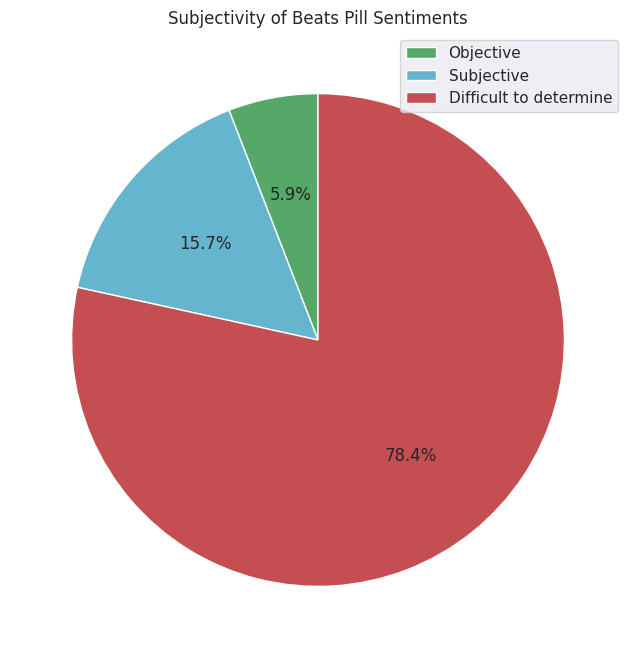

In [ ]:
plt.figure(figsize=(10, 8))
color = ['g', 'c', 'r' ]
plt.pie(beatsubjectivity_score.values(), autopct='%1.1f%%', startangle=90, colors=color)
plt.title('Subjectivity of Beats Pill Sentiments')
plt.legend(beatsubjectivity_score.keys(), loc='upper right')
plt.show()

* A significant portion (78%) of the reviews for the Beats Pill are ambiguous, indicating that this reviews are open to more than one interpretation. This suggests that many customers might have mixed feelings or nuanced opinions about the Beats Pill, possibly valuing certain features while being less satisfied with others.

* 15.6% of the positive reviews are subjective. This could imply that about 16% of the customers prioritize their overall experience, including emotional and experience when assessing the product.

* 5.9% of the positive reviews are objective, indicating that only 6% of customers are more influenced by the technical attributes of the products.





### Sentiment trend: How do sentiment trends evolve monthly across each product?

In [ ]:
avg_month = df[df['year']==2024].groupby(['product_name', 'sentiment_label', 'month'])['sentiment_score'].mean().reset_index()
# Unstacking sentiment_label to create a column of sentiments label for each product and month
sentiment_month = avg_month.pivot_table(index=['product_name', 'month'], columns='sentiment_label', values='sentiment_score', fill_value=0)

#Reset index to get product_name as a column
sentiment_month.reset_index().head()

sentiment_label,product_name,month,Negative,Neutral,Positive
0,Beats Pill,6,-0.979800,0.0,0.894733
1,Beats Pill,7,-0.195467,0.0,0.787769
2,Beats Pill,8,-0.296000,0.0,0.813064
3,Bose SoundLink Color II,1,0.000000,0.0,0.361800
4,Bose SoundLink Color II,2,-0.620400,0.0,0.544350


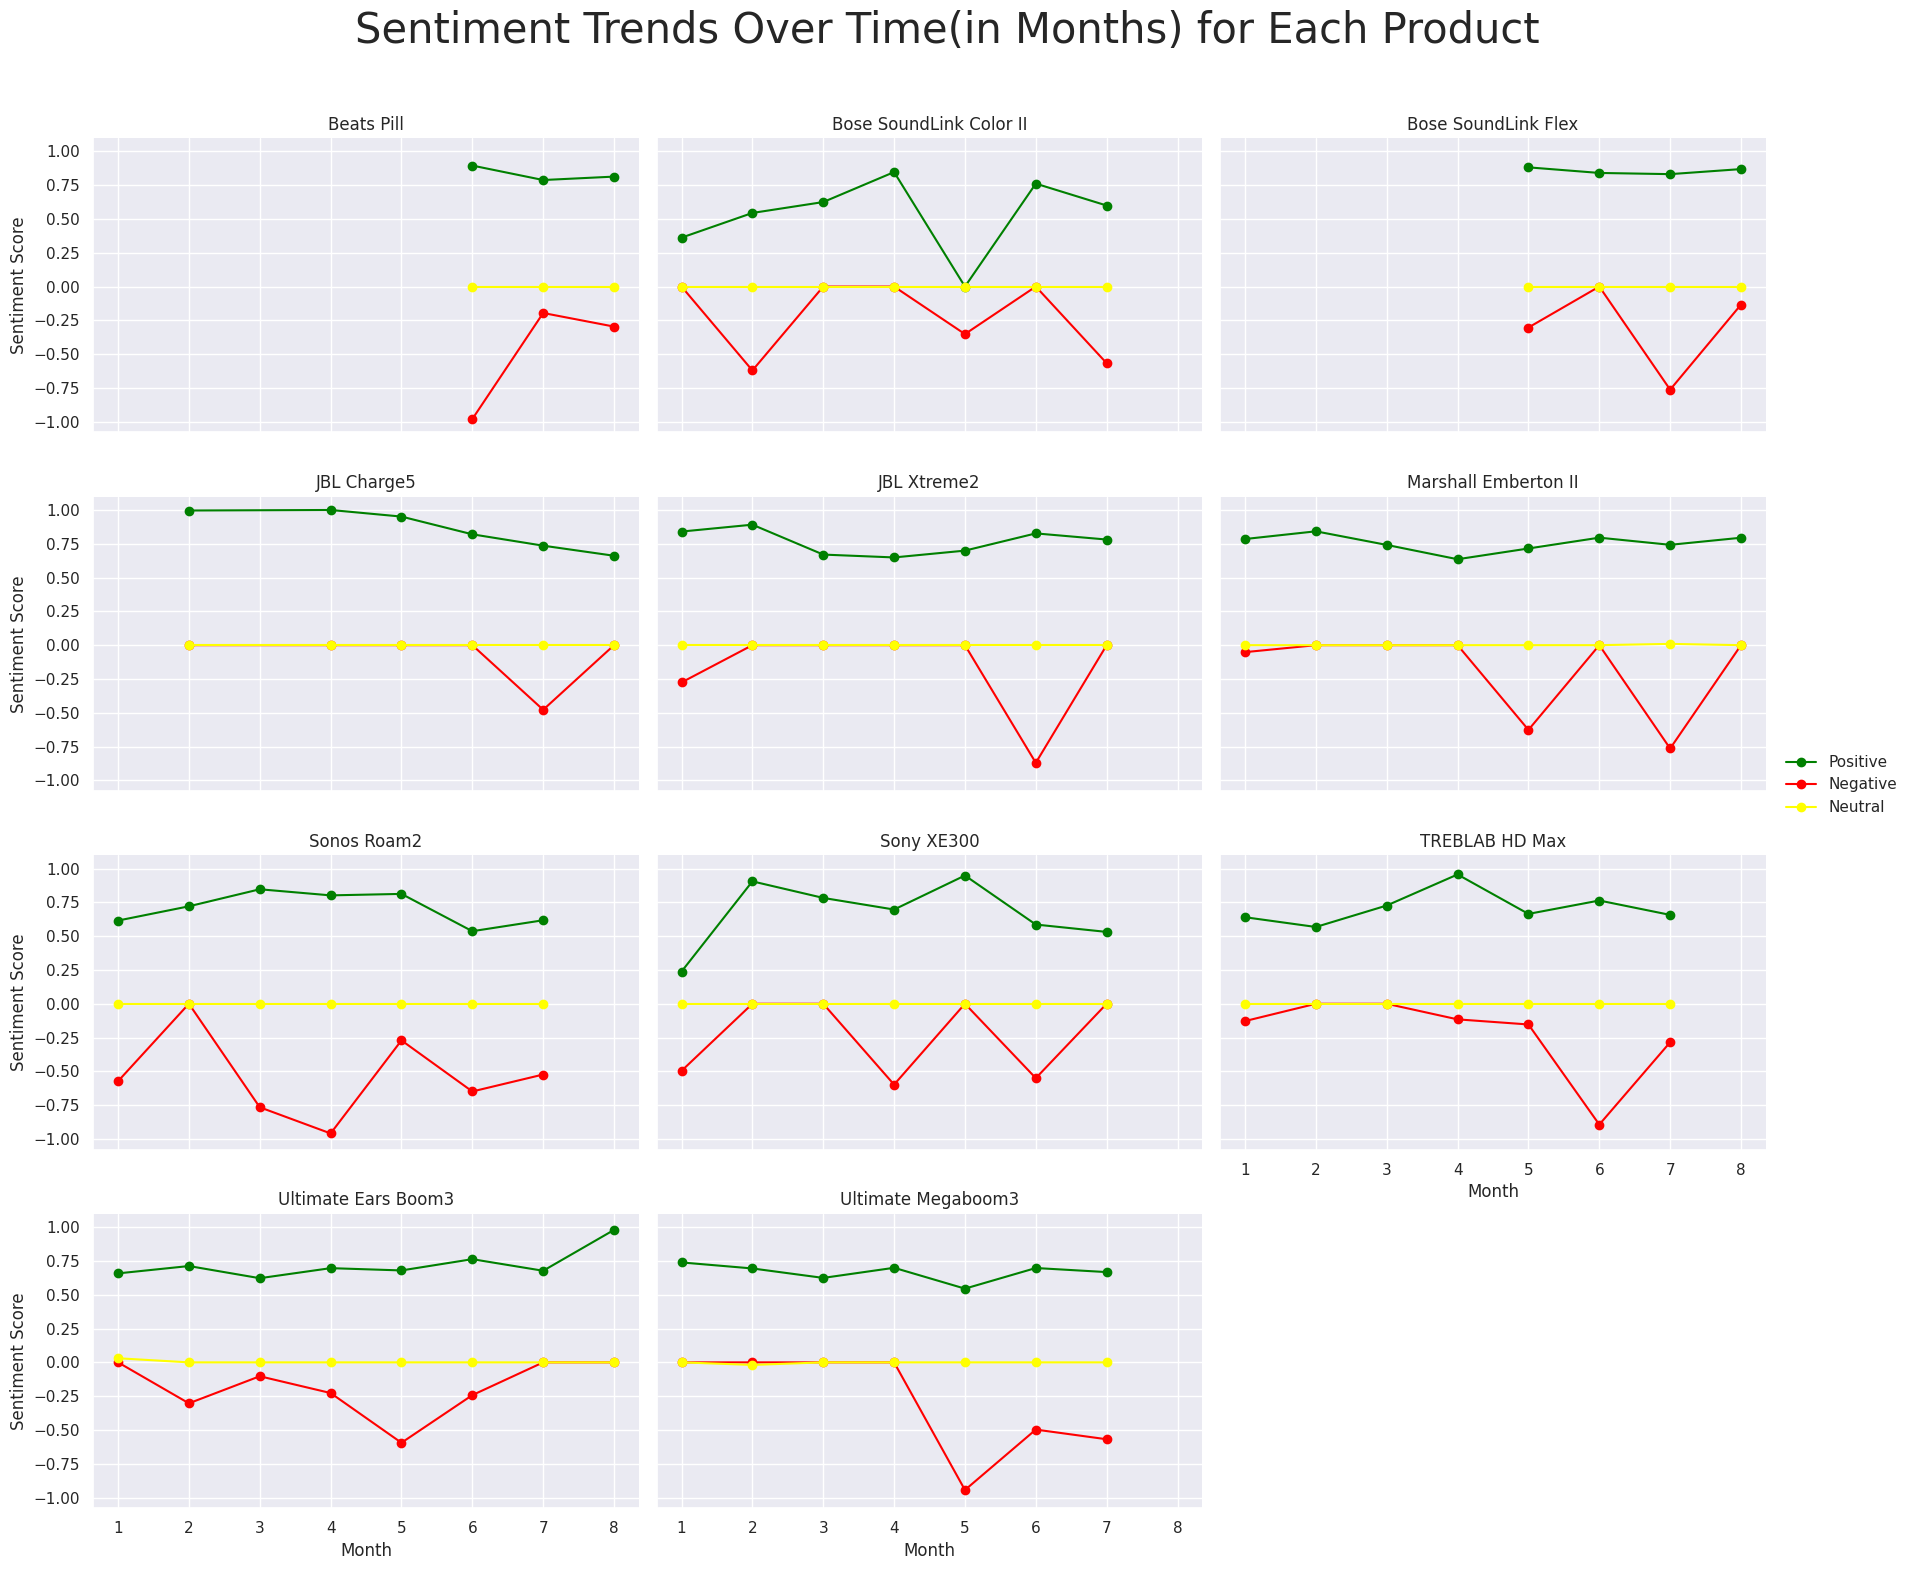

In [ ]:
sentiment_month = sentiment_month.reset_index()
g = sns.FacetGrid(sentiment_month, col='product_name', col_wrap=3, height=4, aspect=1.5)

# Mapping the sentiment trends for each product
g.map(plt.plot, 'month', 'Positive', marker='o', color='green', label='Positive')
g.map(plt.plot, 'month', 'Negative', marker='o', color='red', label='Negative')
g.map(plt.plot, 'month', 'Neutral', marker='o', color='yellow', label='Neutral')

g.set_axis_labels('Month', 'Sentiment Score')
g.add_legend()

 #Update titles for clarity
for ax in g.axes.flatten():
    title = ax.get_title().replace('product_name = ', '')
    ax.set_title(title)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sentiment Trends Over Time(in Months) for Each Product', size=30)
plt.show()

**How do sentiment trends evolve monthly across each product?**

Observations for the 6th, 7th and 8th month: I am focusing on the 6th, 7th and 8th months of year 2024 because that is the period which the new Beats Pill has been on sale.

* Beats Pill sentiment trend shows more variabilty and a noticeable dip in negative sentiment where the polarity reaches a low point at month 6, and positive sentiment remains relatively steady but not high indicating less consistency in customer satisfaction.

* Compared to Beats Pill, most other products analyzed in the chart maintains a more stable sentiment, especially products like Ultimate Ears Boom3 Flex, which show strong positive sentiment with minimal negative sentiment throughout these months suggesting a stronger and more stable customer preference. Marshall Emberton II  shows a significant recovery in customer perception from a negative spike, while the rest maintain consistent levels of satisfaction.


### Word Cloud: What are the features that most customers value the most in each product?

***Creating a World Cloud to visualize frequently mentioned word in reviews of each product.***

In [ ]:
stopwords = set(stopwords.words('english') + ['speaker', 'speakers', 'sony', 'sonos', 'marshall', 'bose', 'jbl', 'megaboom',
                                              'boom', 'treblab', 'beats', 'pill', 'roam', 'xtreme','bluetooth', 'product', 'charge',
                                              'get', 'use', 'one', 'im'])

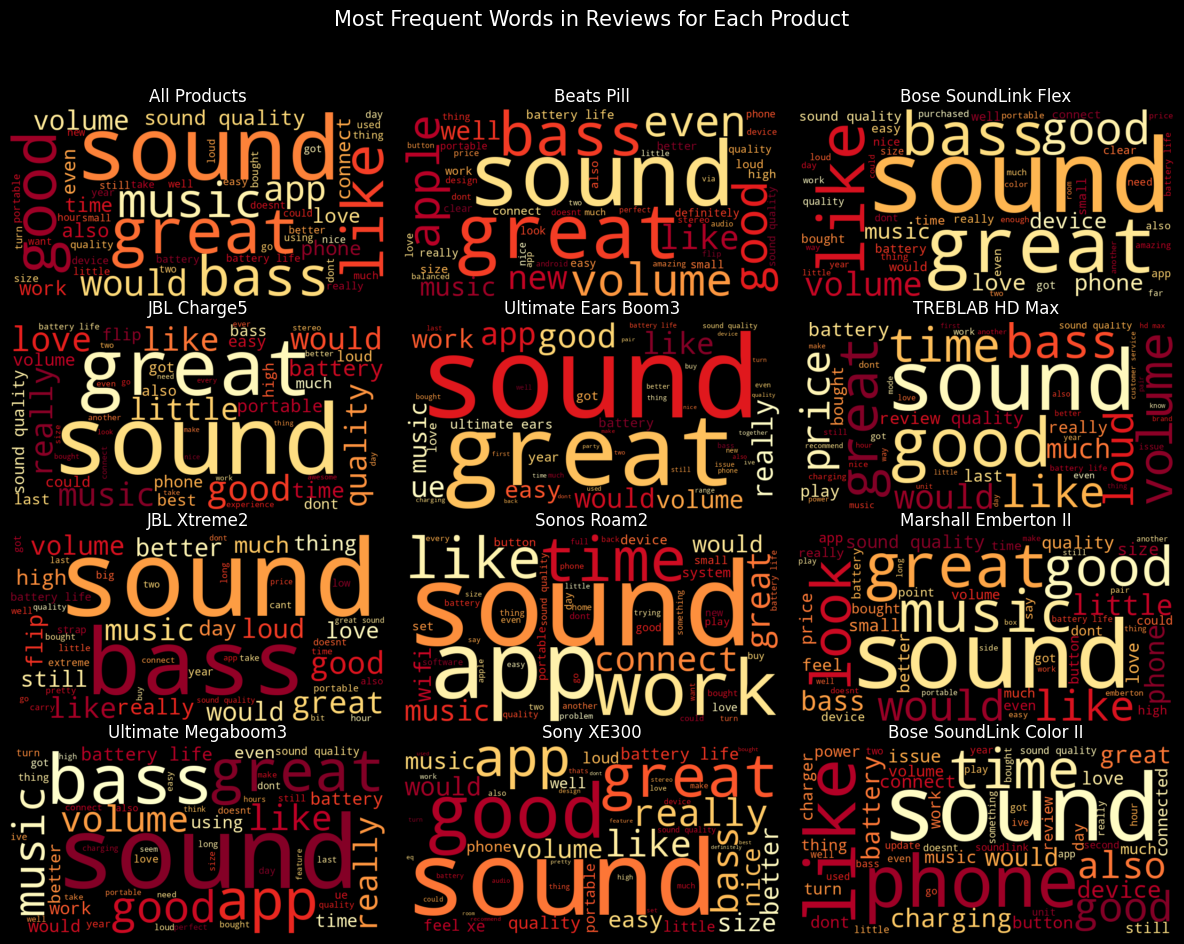

In [ ]:
reviews = ''.join(df['content_clean'])
def show_wordcloud(reviews, subplot_params, product_name):
  wordcloud = WordCloud(width=800, height=400, background_color='#000000', max_words=50, colormap='YlOrRd', stopwords=stopwords).generate(reviews)
  # Plot the word cloud
  plt.subplot(*subplot_params) # *Unpack the tuple into three separate arguments
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(product_name, color='white')

plt.figure(figsize=(12, 10), facecolor='black')
# Show word cloud for all reviews combined
show_wordcloud(reviews, (4, 3, 1), 'All Products')

# Show word clouds for each product
for i, product in enumerate(df['product_name'].unique()):
    # Filter reviews for the current product
    product_reviews = ' '.join(df[df['product_name'] == product]['content_clean'])

    # Call the function to show the word cloud
    show_wordcloud(product_reviews, (4, 3, i + 2), product)

# Add a title for the entire plot
plt.suptitle("Most Frequent Words in Reviews for Each Product", size=15, color='white')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to accommodate title
plt.show()

**Observations:**

*What features does most customers value the most in a product?*
* According to the word clouds, the word composition of Beats Pill is quite similar to it's competitors. Words such as 'sound', 'bass', 'battery',  'Volume' are the most frequently mentioned funtionality which indicate that when purchasing this products customers pay greatest attention to the level of sound and bass generated by the speakers.They also pay attention to battery life, volume and connectivity of the products. Additionally, the inclusion of 'size' among the most mentioned features suggests that it is a significant factor for customers when selecting a speaker.


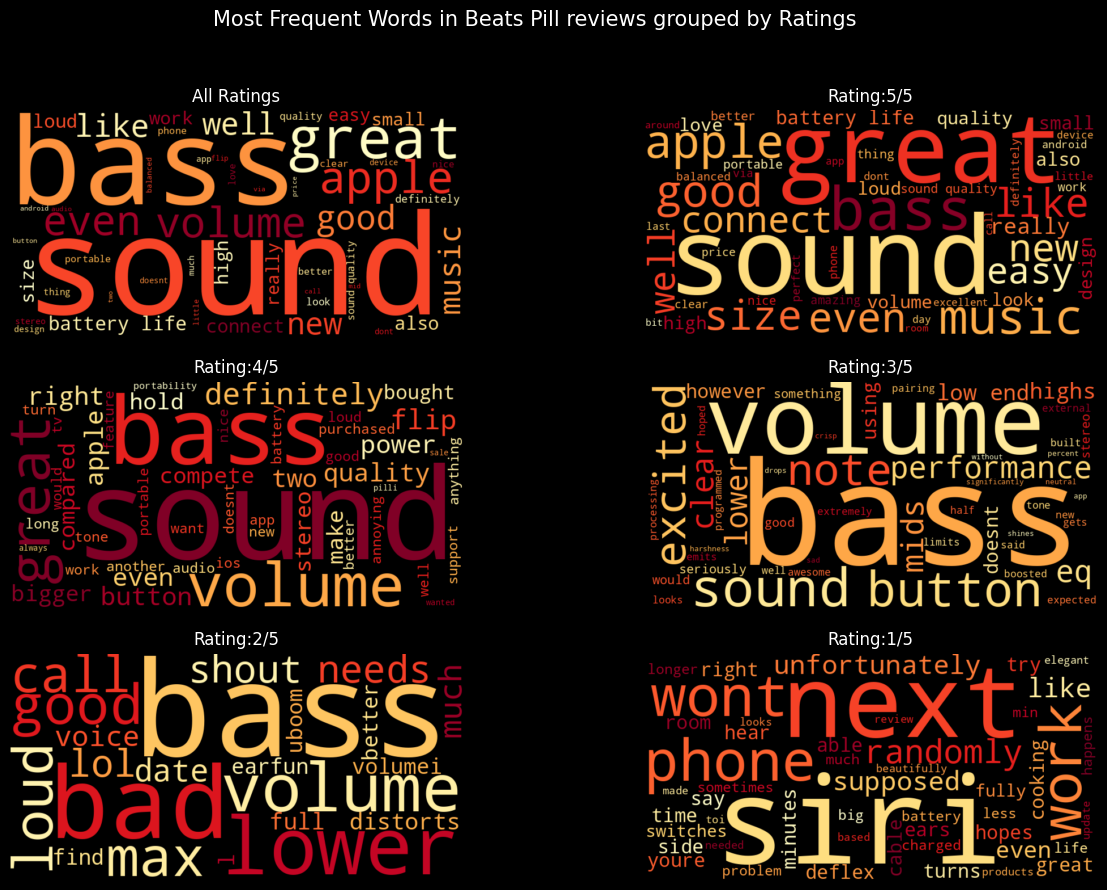

In [ ]:
bp = df[df['product_name'] == 'Beats Pill']
reviews = ''.join(bp['content_clean'])
def show_wordcloud(reviews, subplot_params, rating):
  wordcloud = WordCloud(width=800, height=400, background_color='#000000', max_words=50, colormap='YlOrRd', stopwords=stopwords).generate(reviews)
  # Plot the word cloud
  plt.subplot(*subplot_params) # *Unpack the tuple into three separate arguments
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(rating, color='white')

plt.figure(figsize=(15, 10), facecolor='black')
# Show word cloud for all ratings combined
show_wordcloud(reviews, (3, 2, 1), 'All Ratings')

# Show word clouds for each rating
for i, rating in enumerate(bp['rating'].unique()):
    # Filter reviews for the current rating
    bp_rating = ' '.join(bp[bp['rating'] == rating]['content_clean'])

    # Call the function to show the word cloud
    show_wordcloud(bp_rating, (3, 2, i + 2), f"Rating:{rating}/5")

plt.suptitle("Most Frequent Words in Beats Pill reviews grouped by Ratings", size=15, color='white')
#plt.tight_layout(rect=[0, 0.05,0.95])
plt.show()

**Observations:** This chart shows a brief overview of keywords in customers reviews that highlight some topics to pay attention to regarding Beats Pill.

**Most common words by ratings:**

5-4 ratings word cloud mention words like:
*  sound
*  great
*  bass
*  Apple
* Quality
* Bluetooth

3-1 ratings word cloud mention words like:
* volume
*  bad
*  siri
*  button
* bass
* distorts




### Bar Chart: Which features have generated both the most customer satisfaction and dissatisfaction based on sentiment analysis of customer reviews?


I will create a bar chart displaying the most common words in both positive and negative reviews to highlight the most frequently mentioned issues by satisfied and unsatisfied users. This can provide valuable insights for product developers.

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = set(stopwords.words('english') + ['speaker', 'speakers', 'sony', 'sonos', 'marshall', 'bose', 'jbl', 'megaboom',
                                              'boom', 'treblab', 'beats', 'pill', 'roam', 'xtreme','bluetooth', 'product', 'charge',
                                              'get', 'use', 'one', 'im', "even", "clear", "new", "also", "still", "by", "way", "long",
                                              "life", "would", "tell", "enough", "time", "got", "two", 'well', 'hold', 'dont', "buy", 'using',
                                              'years', 'little', 'well', "still", "really", "much", "bought", "thats", "thing", "feature", "definitely"])

In [ ]:
#Extracting Beats Pill to a new DataFrame
beat_pill = df[df['product_name']=='Beats Pill']
#Filter to get the reviews
positive_reviews = beat_pill[beat_pill['sentiment_label'] == 'Positive']['content_clean']
negative_reviews = beat_pill[beat_pill['sentiment_label'] == 'Negative']['content_clean']

# Combine all reviews into a single string
all_positive = ' '.join(positive_reviews)
all_negative = ' '.join(negative_reviews)

# Tokenize the text
tokens1 = word_tokenize(all_positive)
tokens_positive = [word for word in tokens1 if word.isalpha() and word not in stopwords]
word_freq_positive = Counter(tokens_positive)
bp_positive = pd.DataFrame(word_freq_positive.most_common(), columns=['Word', 'Frequency'])

tokens2 = word_tokenize(all_negative)
tokens_negative = [word for word in tokens2 if word.isalpha() and word not in stopwords]
word_freq_negative = Counter(tokens_negative)
bp_negative = pd.DataFrame(word_freq_negative.most_common(), columns=['Word', 'Frequency'])

#bp_positive.head(), bp_negative.head()

# Sort the values for easy plotting
bp_positive = bp_positive.head(20).sort_values(by='Frequency', ascending=True)
bp_negative = bp_negative.head(20).sort_values(by='Frequency', ascending=True)

In [ ]:
Competitors = df[df['product_name'] != 'Beats Pill']
C = Competitors
#Filter to get the reviews
positive_reviews = C[C['sentiment_label'] == 'Positive']['content_clean']
negative_reviews = C[C['sentiment_label'] == 'Negative']['content_clean']

# Combine all reviews into a single string
all_positive = ' '.join(positive_reviews)
all_negative = ' '.join(negative_reviews)


# Tokenize the text
tokens1 = word_tokenize(all_positive)
tokens_positive = [word for word in tokens1 if word.isalpha() and word not in stopwords]
word_freq_positive = Counter(tokens_positive)
C_positive_reviews = pd.DataFrame(word_freq_positive.most_common(), columns=['Word', 'Frequency'])

tokens2 = word_tokenize(all_negative)
tokens_negative = [word for word in tokens2 if word.isalpha() and word not in stopwords]
word_freq_negative = Counter(tokens_negative)
C_negative_reviews = pd.DataFrame(word_freq_negative.most_common(), columns=['Word', 'Frequency'])

#C_positive_reviews.head(), C_negative_reviews.head()

C_positive = C_positive_reviews.head(20).sort_values(by='Frequency', ascending=True)
C_negative = C_negative_reviews.head(20).sort_values(by='Frequency', ascending=True)

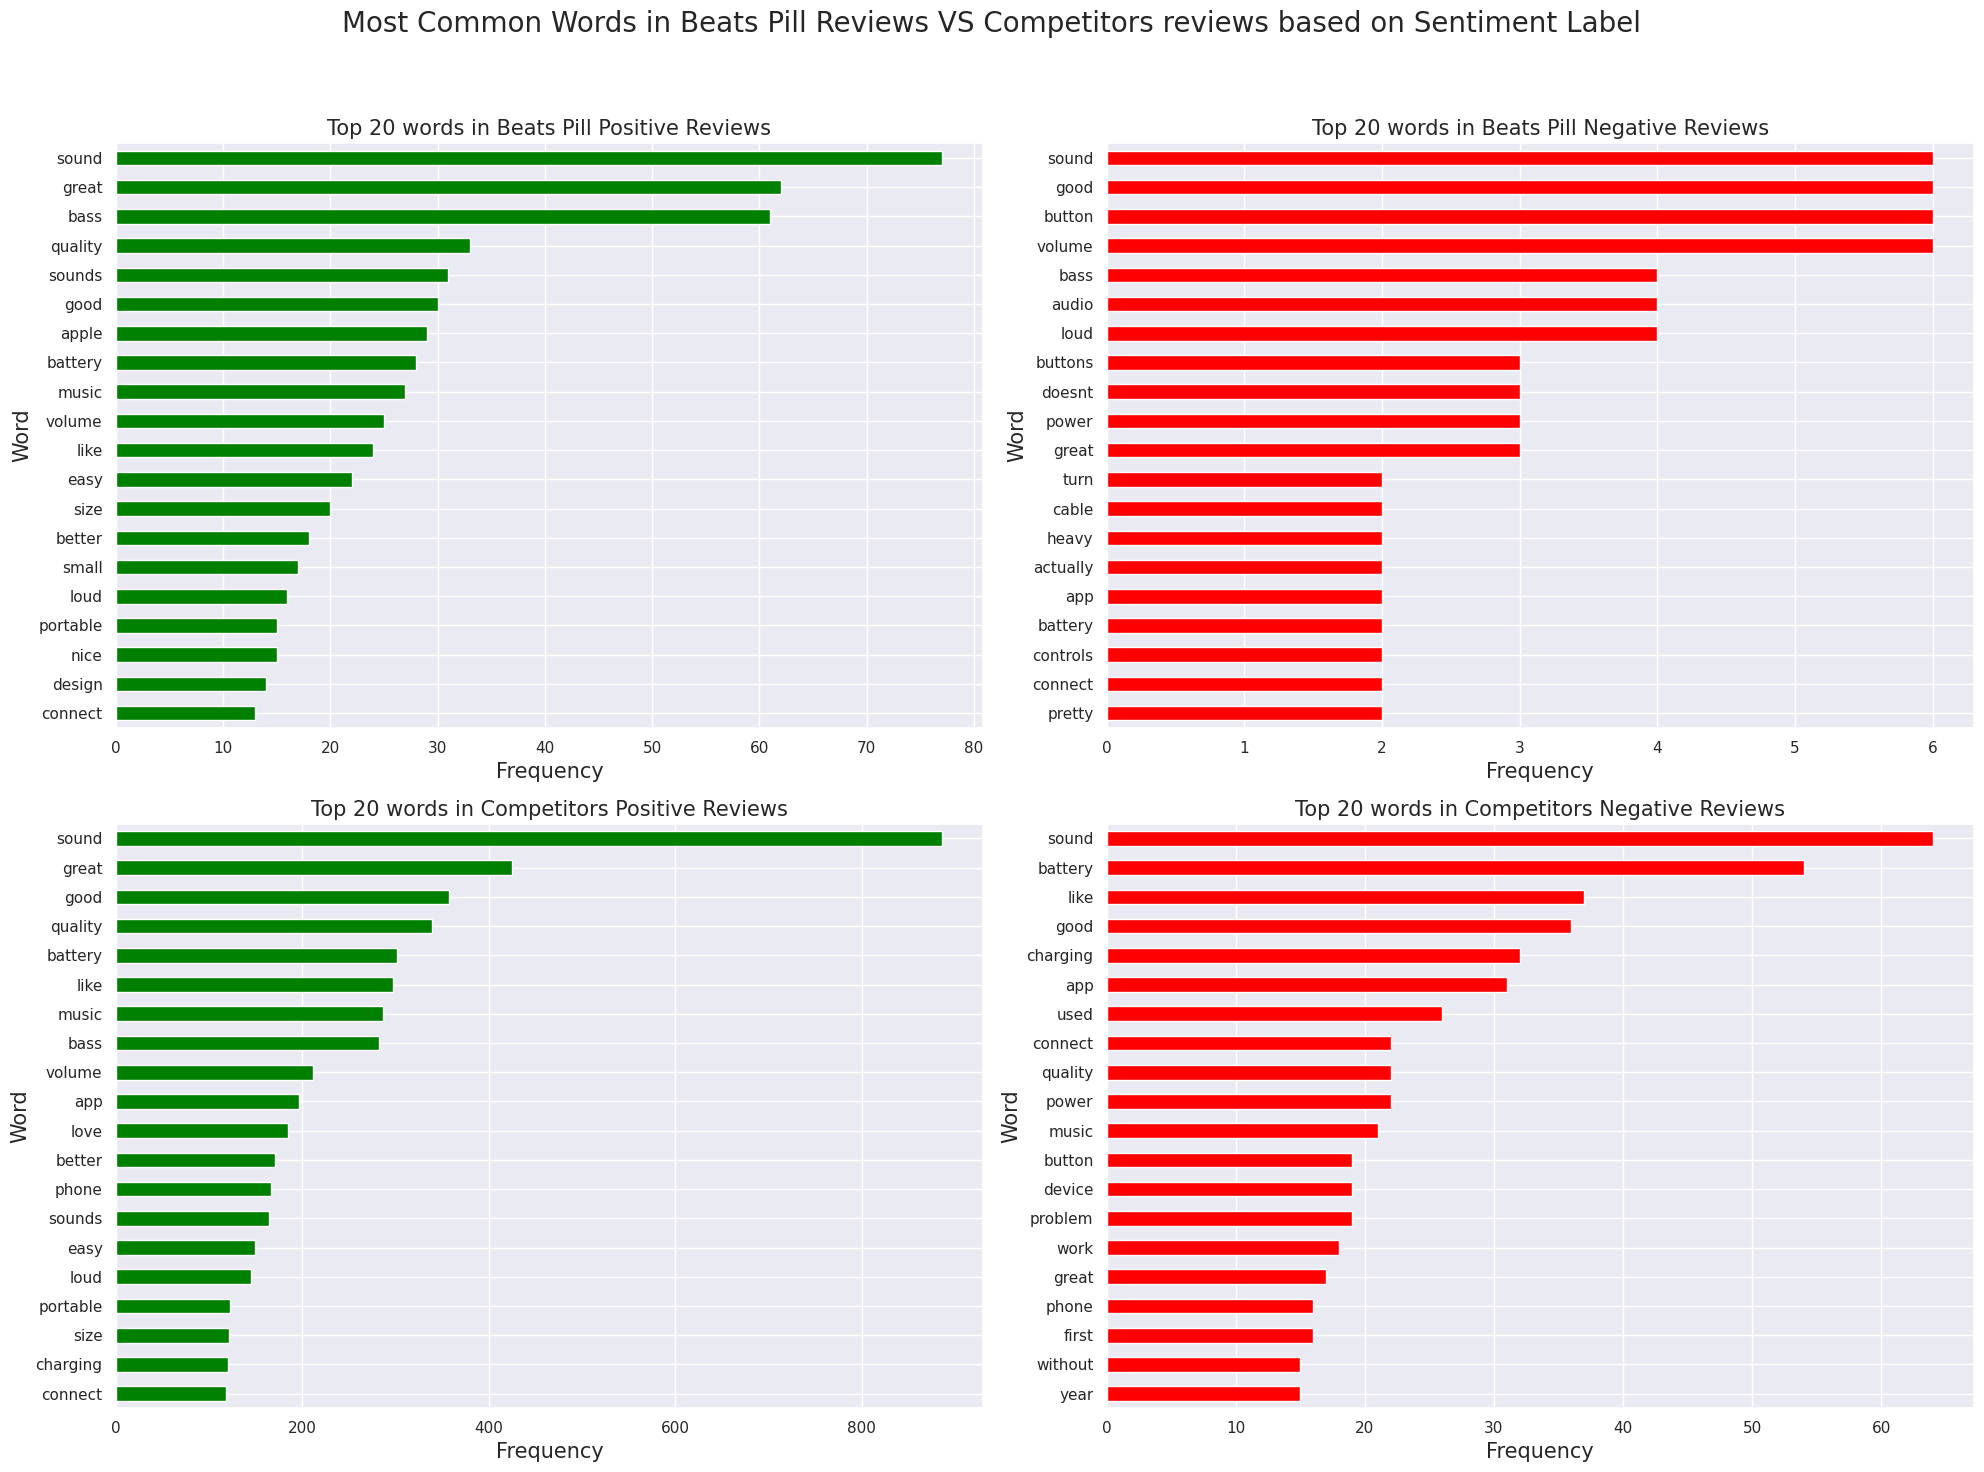

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Plot each sentiment type
bp_positive.head(20).plot(ax=ax[0, 0], y='Frequency', x='Word', kind='barh', color='green', legend=False)
bp_negative.head(20).plot(ax=ax[0, 1], y='Frequency', x='Word', kind='barh', color='red', legend=False)

# Setting titles and labels
ax[0, 0].set_title('Top 20 words in Beats Pill Positive Reviews', fontsize=15)
ax[0, 1].set_title('Top 20 words in Beats Pill Negative Reviews', fontsize=15)

ax[0, 0].set_xlabel('Frequency', fontsize=15)
ax[0, 1].set_xlabel('Frequency', fontsize=15)

ax[0, 0].set_ylabel('Word', fontsize=15)
ax[0, 1].set_ylabel('Word', fontsize=15)

# Competitors
C_positive.head(20).plot(ax=ax[1, 0], y='Frequency', x='Word', kind='barh', color='green', legend=False)
C_negative.head(20).plot(ax=ax[1, 1], y='Frequency', x='Word', kind='barh', color='red', legend=False)

# Setting titles and labels
ax[1, 0].set_title('Top 20 words in Competitors Positive Reviews', fontsize=15)
ax[1, 1].set_title('Top 20 words in Competitors Negative Reviews', fontsize=15)

ax[1, 0].set_xlabel('Frequency', fontsize=15)
ax[1, 1].set_xlabel('Frequency', fontsize=15)

ax[1, 0].set_ylabel('Word', fontsize=15)
ax[1, 1].set_ylabel('Word', fontsize=15)


fig.suptitle('Most Common Words in Beats Pill Reviews VS Competitors reviews based on Sentiment Label', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Positive Reviews**

* Common Functionalities: Customers frequently mention functional features  like "sound," "bass," "battery," "quality," and "volume" in both Beats Pill and its competitors' reviews. This indicates that buyers prioritize product performance in these areas when evaluating speaker quality.

* Positive Sentiment: Words such as "great," "good," "love," and "like" suggest strong positive emotions from buyers, reflecting their satisfaction with the product.

* Unique to Beats Pill: The standout words, "Apple", "design" and "size"(small, portable) in the Beats Pill reviews, point to unique selling points. Customers appreciate the product's portability and its seamless integration with Apple products, differentiating it from it's competitors.

**Negative reviews:**
What are the functionalities that disappointed customers mostly?

**Beats Pill:**
* While some customers praise the sound quality and bass, others have mixed feelings. This indicates that customer expectations around sound, bass, volume, loudness and battery are not consistently met.
* The pesence of terms like "button" and "controls" in negative reviews, but not in positive ones, points to issues with the design, functionality, or ease of use of the buttons on the speaker.
* Words like "app," "connect," and "cable" suggest users are facing difficulties with the app's functionality or the lack of some features in the app to control speaker. There also seems to be some Connectivity issues and charging problems although these are less frequent compared to competitors.

**Competitors**

The functionalities mentioned in  the negative review seems to focus on the technical aspects of the products.
* Competitors receive more negative reviews regarding battery, connect and charging problems, while these issues seem less frequent in Beats Pill reviews.

*  A high frequency of complaints about the "app" in competitors' reviews shows dissatisfaction with the control and management of the speaker via apps, suggesting poor App functionality


## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

* To extract insights using Gemini AI, I first obtained an API key from the official Gemini AI API page in Google AI Studio, this key allows me to authenticate and access Gemini AI services.
* I then use this API key to interact with the Gemini API through Python code.
Set configurations parameters such as temperature, model version, and safety settings for the API request to tailor the responses.
* Then, I initiated a chat session with the model by sending prompts and received responses, which were used to derive insights about the products.

In [ ]:
# Import necessary libaries
import os
import google.generativeai as genai

In [ ]:
api_key = "XXX"

# Function to analyze reviews using Gemini AI
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text



In [ ]:
# Looping to filter the dataset by product name
product_names = 'product_name'
reviews_column_name = 'content_clean'
for product_name in df[product_names].unique():
    product_reviews = df[df[product_names] == product_name][reviews_column_name].tolist()
    prompt_message = "Analyze the following reviews for product name {product_name} and summarize both positive and negative insights :"
    insights = analyze_reviews(product_reviews, api_key, prompt_message)
    #print(f"Product_name: {product_name}\nInsights: {insights}\n")


In [ ]:
product_names = 'product_name'
reviews_column_name = 'content_clean'
for product_name in df[product_names].unique():
    product_reviews = df[df[product_names] == product_name][reviews_column_name].tolist()
    prompt_message = "What are the Unique Selling Points of the products{product_name} according to the reviews:"
    insights = analyze_reviews(product_reviews, api_key, prompt_message)
    #print(f"Product_name: {product_name}\nInsights: {insights}\n")


In [ ]:
product_names = 'product_name'
reviews_column_name = 'content_clean'
for product_name in df[product_names].unique():
    product_reviews = df[df[product_names] == product_name][reviews_column_name].tolist()
    prompt_message = "In what specific areas do other speakers outpeform Beats Pill?:"
    insights = analyze_reviews(reviews, api_key, prompt_message)
    #print(f"Product_name: {product_name}\nInsights: {insights}\n")

In [ ]:
reviews_column_name = 'content_clean'
reviews = bp[reviews_column_name].tolist()
# Send prompts
prompt_message = "Create a list of product features that customers are dissatisfied with based on customer reviews:"
insights = analyze_reviews(reviews, api_key, prompt_message)
#print(insights)

In [ ]:
bp = df[df['product_name'] == 'Beats Pill']
reviews_column_name = 'content_clean'
reviews = bp[reviews_column_name].tolist()
# Send prompts
prompt_message = "Identify the different ways people are using the product based on reviews, and compile a list of the most common use cases:"
insights = analyze_reviews(reviews, api_key, prompt_message)
#print(insights)

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


### PROMPT

**PROMPT 1:**

**Analyze the following reviews for all the products and summarize both the positive and negative insights**

1. **Beats Pill**
* **Positive Insights:** Reviewers consistently praise the sound quality highlighting its powerful bass, clear vocals, and balanced sound for various genres. They also appreciate it's portability due to its compact size, and durability with water and dust resistance. The battery life was noted for its longevity, and integration with Apple devices was seamless providing a convenient user experience. The speakerphone feature, sleek design and color option were also highlighted.
* **Negative Insights:** Some reviewers were disappointed by the lack of app control for sound customization, battery monitoring and sound distortion at higher volumes leading to a less enjoyable experience. There were reports of inconsistent battery life, confusion with the button design and Issues with Siri integration. some reviewers believe the price is a bit high for a portable speaker, especially considering the lack of app control and potential sound quality issues.
2. **Bose SoundLink Flex**
* **Positive Insights:** Praised for its excellent sound quality and durability with a waterproof design. Users highlighted the long battery life, easy setup, and strong build quality. Many found it to be a good value for money with its sleek design.
* **Negative Insights:** Some users felt the battery life could be shorter than expected. The Bose Connect app was deemed unnecessary, and voice prompts were seen as annoying. The lack of stereo sound for a single unit and volume control issues were noted, along with the speaker's stability concerns.
3. **JBL Charge 5**
* **Positive Insights:** Received high marks for sound quality and battery life, with the ability to act as a power bank being a bonus. It was praised for its rugged design, portability, and ease of use. Users appreciated the PartyBoost feature and felt it offered good value for money.
* **Negative Insights:** Users faced issues with the skip button and Bluetooth connectivity, particularly with older devices. Some found the size and weight to be less portable, and the price was higher than some alternatives. The JBL app received criticism for limited customization options.
4. **Ultimate Ears Boom 3**
* **Positive Insights:** The speaker was praised for its sound quality, portability, durability nd rugged build. It offers a long battery life and easy setup with intuitive controls. Features like PartyUp for linking multiple speakers and the Magic Button for controls were well-received.
* **Negative Insights:** Some users experienced Bluetooth connection issues and battery life problems. The use of a Micro USB charging port was seen as outdated, and the app had functionality issues. Sound distortion at higher volumes and overpowering bass were also noted.
5. **Treblab HD Max**
* **Positive Insights:** Reviewers appreciated the sound quality, loud volume, and portability with a sleek design and carrying strap. It was noted for its long battery life and value for money. Positive mentions were made for the excellent customer service.
* **Negative Insights:** Port placement was criticized, and there were some battery issues reported. While the speaker was generally loud, some found the maximum volume underwhelming. The bass boost mode was sometimes muddy, and there was a lack of advanced features.
6. **JBL Xtreme 2**
* **Positive Insights:** Known for its excellent sound quality, especially with strong bass and clear highs. It was praised for its loud volume, long battery life, and durable design with versatile connectivity options.
* **Negative Insights:** The high price and lack of EQ control were drawbacks for some users. The bass-heavy sound could be overwhelming, and the midrange sound was considered lacking by some. Size and weight were also seen as less ideal for portability.
7. **Sonos Roam 2**
* **Positive Insights:** Users loved the sound quality and portability. The integration with the Sonos system was seamless, and the waterproof and dustproof design was appreciated. It supports both Bluetooth and AirPlay connectivity.
* **Negative Insights:** There were significant complaints about battery life, connectivity issues, and unintuitive controls. The setup process was described as complex, and some users found the speaker overpriced for its features.
8. **Marshall Emberton II**
* **Positive Insights:** Praised for its sound quality, portability, and battery life. Users appreciated the design and build with a retro look and ease of use with simple controls.
* **Negative Insights:** Some reviewers felt the volume could be higher, and the app was criticized for being buggy and lacking features. There were also comments about sound consistency and the price being high for the features offered.
9. **Ultimate Ears Megaboom 3**
* **Positive Insights:** Known for its exceptional sound quality, rugged build and durability. It was praised for its long battery life, 360-degree sound projection, and pairing features for stereo sound. The ease of use and strong build quality were also highlighted.
* **Negative Insights:** Some users were disappointed with the Micro USB charging port, and there were app issues related to connectivity and functionality.
10. **Bose SoundLink Color II**
* **Positive Insights:** Praised for its rich, clear and powerful sound quality and durability with a waterproof design. Users highlighted the long battery life, easy setup, and strong build quality.
* **Negative Insights:** Charging Issues and bluetooth connectivity are the most frequent complaint from users.Some reviewers find the buttons on the speaker difficult to press and hard to see due to their low-contrast design and battery drainage when off.

**PROMPT 2:**

**What are the Unique Selling Points of all the products according to the reviews.**

1. **Sound quality and performance is paramount:** Customers prioritize good sound quality especially a balance between clear highs and mids and a solid bass response, catering to different musical tastes and genres.

2. **Portability and Durability:** The ability to take the speaker on the go and its ruggedness to withstand various elements are highly valued.

3. **Battery life:** Long-lasting battery life is a key selling point, allowing for hours of uninterrupted music playback.

4. **Compact and Sleek Designs:** The speakers are noted for their sleek, modern designs, often described as stylish and compact. This makes them easy to transport and use in various settings, from home decor to outdoor adventures.

5. **Unique features** such as water and dust resistant, multiple connectivity options, including Bluetooth and sometimes app integration, making them compatible with a wide range of devices and user preferences. This make these products stands out and highly valued by customers.

6. **Additional Functionalities:** Features like built-in speakerphones, seamless integration with ecosystems (e.g., Apple or Sonos), and the ability to charge other devices enhance the functionality of these speakers beyond just audio playback.



**PROMPT 3:**

Create a list of product features that customers are dissatisfied with based on customer reviews.

Based on the reviews, here are the list of product features customers are dissatisfied with Beats Pill:
1. **Sound quality:**   
* Bass heavy sound: While many customers appreciate the powerful bass of the product, others find it too overwhelming for certain music genres. This can lead to muffled highs and a less balanced sound and may not suit all listeners.
* Lack of EQ Control: The absence of an equalizer feature in the app limits user customization for adjusting the sound profile to their preference.
* Voice distiortion: Some users reported issues with voice distortion and reduced sound quality at higher volume, making it difficult to understand conversations during calls.

2. **User interface and functionality:**
* Integration Issues: Users experienced problems with Siri voice commands not being picked up properly by the speaker, requiring users to be in close proximity to the device.
* Lack of App control: Many users are disappointed by the absence of a reliable app for sound customization, battery life monitoring and connection management.
* Button control: Some users complain about the confusing button layout and the need for multiple button combination.
* Random On/Off Behavior: Some users reported instances where the speaker would randomly turn on and off, even when fully charged.
3. **Design:**
* Durability: Some users report issues with the silicone material on the back of the speaker attracting dust and hair, making it difficult to clean and it's inability to withstand rough conditions.



**PROMPT 4:**

Identify the different ways people are using the product based on reviews and compile a list of the most common use cases.

**1. Portable Music Listening:**
* The most common use case, customers rave about the sound quality, bass, and portability, making it ideal for  listening to music on the go, at the beach, or around the house.
* **Examples:** "Perfect for when I'm on the go", "taking it to the beach", "great for outdoor parties", "use it at work", "sounds good even in the open patio"

**2. Speakerphone:**
* Many users highlighted the crystal-clear call quality, making the Beats Pill a viable alternative for taking calls at work or on the go.
* **Examples:** "Doubles as a speakerphone", "take crystal clear teams calls", "great addition for calls", "speakerphone has decent clarity"

**3. Home Audio System:**
* Some users utilize the Beats Pill as part of their home setup, either as a standalone speaker or for stereo pairing.
* **Examples:** "portable speaker for the home setup", "paired to my Apple TV".

**4. Gaming Companion:**
* The Beats Pill's wired connection via USB-C makes it appealing for gamers wanting a high-quality audio experience for gaming handhelds.

**5. Apple Ecosystem Integration:**
* The Beats Pill seamlessly integrates with Apple devices, making it a popular choice for iPhone and iPad users.

**6. Charging Feature:**
* While not a primary use case, some appreciate the Beats Pill's ability to act as a portable charger for their phone.
* **Examples:** "charge your phone and vice versa", "can act as a portable battery bank"

**7. Shower Speaker:**
* The water-resistant design makes the Beats Pill suitable for use in showers or other humid environments.
* **Examples:** "dedicated shower speaker", "don't worry about it getting wet"
8. **Paired Stereo System:**
* Multiple Pill+ speakers can be paired to create a stereo sound experience.






### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

1. **Sound Quality**
* **Key Insight:** Across all products, sound quality is a critical factor for consumers. High praise is given to speakers that deliver clear, balanced sound with strong bass and minimal distortion.
* **Relevance to Beats by Dre:** Positive reviews highlight strong bass and balanced sound, which aligns with Beats Pill identity of providing a bass-heavy sound.However, some negative feedback includes sound distortion at high volumes. This insights suggest that while consumers appreciate powerful bass, they also value overall audio clarity and minimal distortion. Beats can leverage this by ensuring that their speakers deliver a balanced audio experience, emphasizing clarity in mids and highs in addition to their signature bass to address sound distortion complaints.

2. **Battery Life and Additional Functionality**
*  **Key Insights:** Long battery life is consistently highlighted as a valuable feature among all the products. Beats Pill battery life is noted for its longevity, but there are complaints about inconsistent performance and confusion with the button design. Issues with lack of app control for battery monitoring and sound customization also causes concerns.
* **Relevance to Beats by Dre:** To improve user experience, Beats could refine the button layout for better usability and consistency in battery performance. They should provide a reliable app for speakers that allows for battery monitoring, customizable sound settings (like EQ controls) and enhanced connectivity options for user satisfaction.

3. **Integration with other systems**
* **Key Insight:** Seamless integration with ecosystems like Sonos with its app and ease of use are highly valued by users.Beats Pill benefits from the seamless integration with Apple systems providing a smooth user experience for Apple users.However, there are issues with Siri integration.
* **Relevance to Beats by Dre:** Expanding this compatibility to other systems like Android without compromising the intuitive design could broaden the appeal and refining integration with smart assistants(like siri) could make Beats products more versatile.

4. **Durability and Portability**
* **Key Insight:** Consumers highly value portability, compact design, and durability, including waterproof and dustproof features for outdoor use. While Reviewers appreciate the Beats Pill compact size, portability, and durability, including water and dust resistance, other competitors like the JBL Charge 5 and Ultimate Ears Boom 3 are also noted for their rugged design and ability to withstand rough conditions, which are critical features for outdoor use.
* **Relevance to Beats by Dre:** Beats can focus on enhancing the durability of their products, perhaps by introducing more rugged designs and ensuring that their speakers are more resistant to various environmental conditions. This would appeal to users looking for portable speakers that can withstand rougher use and could help Beats tap more into the market of outdoor enthusiasts.

In conclusion,  Beats by Dre can further strengthen its position in the competitive market of portable Bluetooth speakers by focusing on sound quality improvements, expanding the durability of their products and enhancing battery life and additional functionalities



## 8. Comparative Analysis

### 8.1 Competitor Overview
List the competitors analyzed and provide a brief overview of their market positioning.

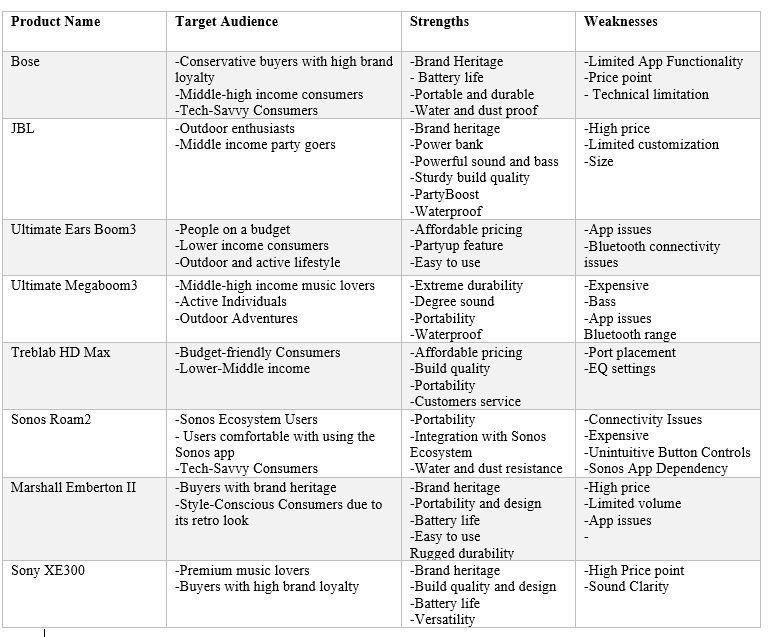

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

**Strengths**
* Sound quality
* Bass-Heavy
* Portability and sleek design
* Brand loyalty and recongnition
* Apple Ecosystem Integration
* Endorsement by Celebrities and athletes
* Water and dust resistance

**Weaknesses**
* Lack of App control
* Confusing Button control
* Limited Siri functionality
* Bass distortion at higher volume

**Opportunites**
* App Improvement
* Technological integration with virtual assistants like Siri and Alexa
* Expanding the product availabity in more countries.
* Offer more color options that will appeal to a younger audience.
* Leveraging on Apple brand loyalty to increase visibility.
* Targeting broader audience, not limiting it to Gen Z alone.
* Improve Durability to withstand rougher conditions.

**Threats**
*  Intense competition with strong brands offering similar product in high quality.
*  Beats Pill high price may deter cost-conscious consumers especially when there are cheaper product with similar features.
*  Beats Pill heavy bass which does not appeal to some audiophiles may limit customer base.
*  Large volume of counterfeit products could damage the brands reputation.


## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

1. Beats can enhance sound quality by adding equalizers feature in the accompanying app to allow for more personalized sound customization, addressing issues with speakers being to bass-heavy.
2. Minimize distortion at higher volume to achieve better clarity at all volume levels.
3. Simplify controls by offering clear labeling and intuitive button placement, for power, volume and track navigation for better ease of use.
4. Improving the accompanying App features by providing more comprehensive control options for equalizers customization, checking battery information and managing connection.
5. Improve Siri integration by improving the speaker's microphone sensitivity so that that it can pick up voice commands from a far end.
6. Use a more resistant material for the rubberized texture to prevent the speaker's susceptibility to dust and hair.
7. Expand seamless integration with Apple device to other systems like Android without compromising the intuitive design.

### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.


* Continue leveraging on high profile celebrities to promote Beats Pill
* Colaborate with popular bloggers, influencers and youtubers that can create authentic such as unboxing videos and product reviews featuring Beats Pill.
* Partner with charities or social causes that align with the brand values.
* Sponsor music events to showcase the Beats Pill in settings that resonate with its target audience.
* Offer more limited discount to boost sales.


### 9.3 Future Research
Suggest areas for future research or additional data that could be collected to further enhance the analysis.

* In the future, they should consider utilizing a larger volume of data from different sources to scale up the research and include more numerical data for statistical analysis.





## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

In this project sentiment analysis was performed on Beats Pill speaker to determine customers sentiments by identifying its strengths and weaknesses. The data used consisted of 1049 customers reviews from Amazon.com for the Beats Pill and eight(8) competitors products. By using sentiment analysis and Gemini AL integration the following insights were obtained:

* The overall sentiments towards Beats Pill is predominantly positive with few negative reviews.
* The customers appreciate specific features such as sound quality, heavy bass, sleek design, battery life, speakerphone capability, Apple connectivity and IP67 waterproof and dust-proof.
* The sentiment analysis of the competitors like Bose, JBL, and Sony highlights how consumer preferences differ across brands and products.
* Some customers mention features that the Beats Pill is lacking such as overly heavy bass, confusing buttons layout, sound distortion, lack of App control and siri integration.

* Reviewers note that the design of the new Beats Pill is a significant upgrade over the previous Beats Pill Plus, especially considering the years between their releases.


In conclusion, this project contributes significantly to understanding consumer sentiment towards Beats by providing a comprehensive analysis of customer reviews compared to competitors. By leveraging sentiment analysis, the project offers valuable insights into customer preferences, highlighting strengths and areas for improvement for the Beats Pill. The findings from this project shows  the importance of continuously analyzing customer reviews to stay competitive in the market.

## 11. References
List all the sources, tools, and references used in the project.


* https://medium.com/swlh/data-science-with-python-based-on-customer-reviews-bdbee2c0adde

* https://www.analyticsvidhya.com/blog/2021/04/3-central-tendency-measures-mean-mode-median/

* https://oxylabs.io/products/scraper-api/ecommerce/amazon/reviews

* https://aistudio.google.com/app/apikey?_gl

* https://www.amazon.com/

* https://www.cnet.com/tech/home-entertainment/beats-pill-bluetooth-speaker-review-back-from-the-dead-and-improved-in-a-few-key-ways/

* https://www.beatsbydre.com/speakers/beats-pill







